In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("drug.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
cols = ['Sex','BP', 'Cholesterol','Drug']
for col in cols:
    print(f"Name of the colums - {col}")
    print(df[col].value_counts())
    print()

Name of the colums - Sex
M    104
F     96
Name: Sex, dtype: int64

Name of the colums - BP
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

Name of the colums - Cholesterol
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Name of the colums - Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64



In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
for col in cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].values)

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [11]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


<Axes: xlabel='Drug', ylabel='count'>

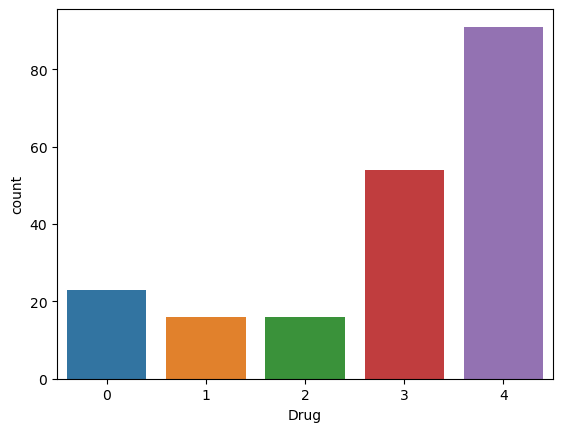

In [12]:
sns.countplot(x = df['Drug'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

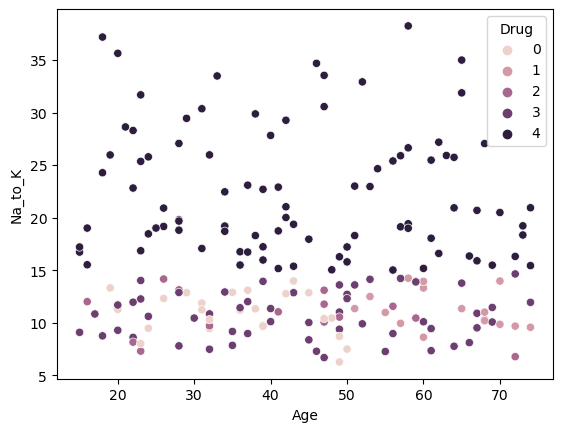

In [13]:
sns.scatterplot(x = 'Age', y = 'Na_to_K', hue = 'Drug', data = df)

<Axes: xlabel='Na_to_K', ylabel='Count'>

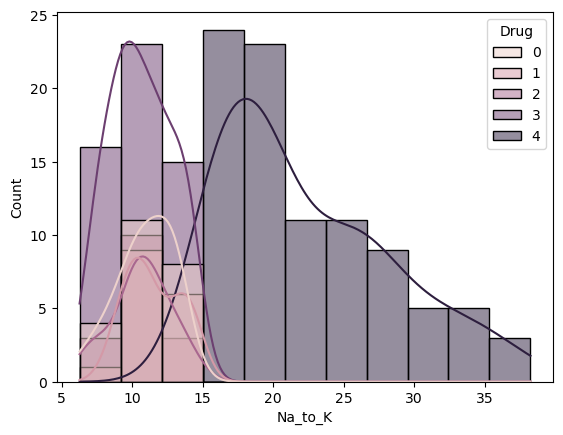

In [14]:
sns.histplot(data=df, x = 'Na_to_K', hue = 'Drug', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

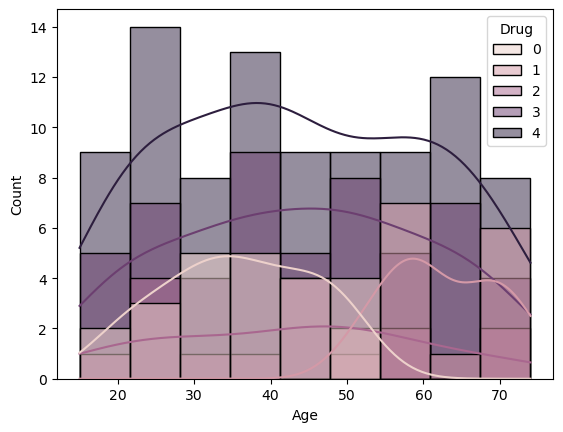

In [15]:
sns.histplot(data=df, x="Age", hue = "Drug", kde=True)

<Axes: >

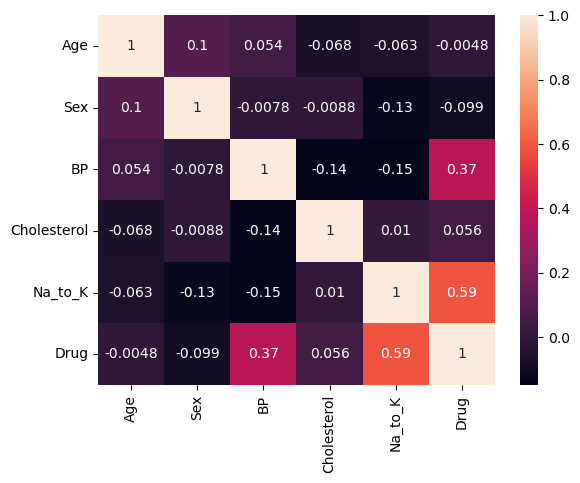

In [16]:
sns.heatmap(df.corr(),annot=True)

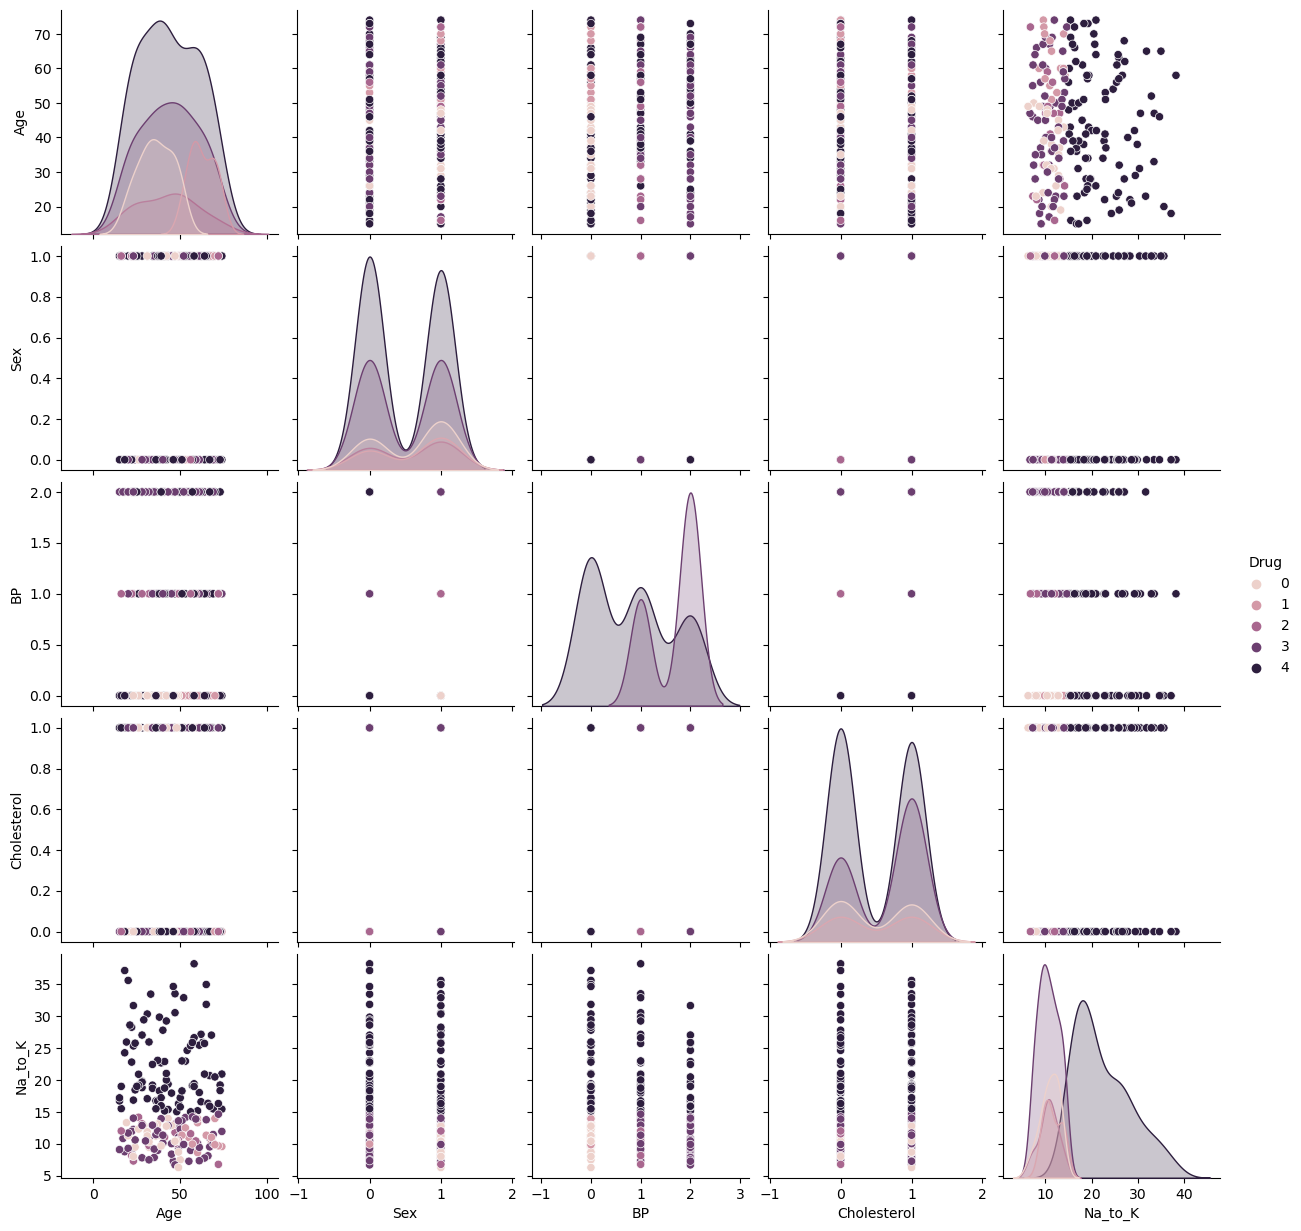

In [18]:
sns.pairplot(df, hue = "Drug")

In [19]:
X = df.drop('Drug', axis = 1)
y = df['Drug']

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [21]:
params = {'max_depth' : [None, 2,3,4,5,6],
          'criterion' : ['gini', 'entropy'],
          'min_samples_split' : [5,10,12],
          'max_leaf_nodes' : [10,15,20,None]}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rSearch = RandomizedSearchCV(model,param_distributions=params,n_iter=10, cv=5)
rSearch.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

In [23]:
rSearch.best_score_

0.985

In [25]:
rSearch.best_estimator_

DecisionTreeClassifier(min_samples_split=12)

In [26]:
rSearch.best_params_

{'min_samples_split': 12,
 'max_leaf_nodes': None,
 'max_depth': None,
 'criterion': 'gini'}

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [28]:
model_refined = DecisionTreeClassifier(criterion='gini', min_samples_split=12)

In [29]:
model_refined.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=12)

In [30]:
model_refined.score(X_test,y_test)

0.9833333333333333